In [1]:
#importing function libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Data import

In [2]:
#importing dataset
df=pd.read_csv("Cuisine_rating.csv")

In [3]:
df.head()

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


# Data Preprocessing

In [4]:
#Getting range of rows and columns in a dataset
df.shape

(200, 15)

In [5]:
#gather information about datatypes and non null values of columns in a dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User ID         200 non-null    int64  
 1   Area code       200 non-null    int64  
 2   Location        200 non-null    object 
 3   Gender          200 non-null    object 
 4   YOB             200 non-null    int64  
 5   Marital Status  200 non-null    object 
 6   Activity        200 non-null    object 
 7   Budget          200 non-null    int64  
 8   Cuisines        200 non-null    object 
 9   Alcohol         200 non-null    object 
 10  Smoker          200 non-null    object 
 11  Food Rating     200 non-null    int64  
 12  Service Rating  200 non-null    int64  
 13  Overall Rating  200 non-null    float64
 14  Often A S       200 non-null    object 
dtypes: float64(1), int64(6), object(8)
memory usage: 23.6+ KB


In [6]:
#gathering information of numeric columns about count,mean,median,mode,standard deviation,min,max,25%,50%,75% in a dataset
df.describe()


,User ID,Area code,YOB,Budget,Food Rating,Service Rating,Overall Rating
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,141.060000,1984.830000,3.815000,3.220000,3.230000,3.225000
std,57.879185,26.130257,16.809339,1.056578,1.411226,1.526022,1.079445
min,1.000000,101.000000,1955.000000,1.000000,1.000000,1.000000,1.000000
25%,50.750000,123.000000,1971.000000,3.000000,2.000000,2.000000,2.500000
50%,100.500000,135.000000,1987.000000,4.000000,3.000000,3.000000,3.000000
75%,150.250000,158.000000,2000.000000,5.000000,5.000000,5.000000,4.000000
max,200.000000,199.000000,2009.000000,5.000000,5.000000,5.000000,5.000000


In [7]:
#Gathering information about  null values of columns in a dataset
df.isna().sum()

User ID           0
Area code         0
Location          0
Gender            0
YOB               0
Marital Status    0
Activity          0
Budget            0
Cuisines          0
Alcohol           0
Smoker            0
Food Rating       0
Service Rating    0
Overall Rating    0
Often A S         0
dtype: int64

# Hence it is concluded that there are no null values

In [8]:
#Getting only numeric columns in a dataset
num=df.select_dtypes(exclude=object)


In [9]:
#Getting information about outliers of columns in a dataset
def Find_Outliers(df):
    for i in num:
        q1=df[i].quantile(0.25)
        q3=df[i].quantile(0.75)
        IQR=q3-q1
        l1=q1 - (IQR * 1.5)
        l2=q3 + (IQR * 1.5)
        l3=df[i]<=l1
        l4=df[i]>=l2
        outliers = df[((df[i]<(l1)) | (df[i]>(l2)))]
        return outliers

outliers = Find_Outliers(df)
print('number of outliers: '+ str(len(outliers)))
print('max outlier value: '+ str(outliers.max()))
print('min outlier value: '+ str(outliers.min()))

number of outliers: 0
max outlier value: User ID           NaN
Area code         NaN
Location          NaN
Gender            NaN
YOB               NaN
Marital Status    NaN
Activity          NaN
Budget            NaN
Cuisines          NaN
Alcohol           NaN
Smoker            NaN
Food Rating       NaN
Service Rating    NaN
Overall Rating    NaN
Often A S         NaN
dtype: object
min outlier value: User ID           NaN
Area code         NaN
Location          NaN
Gender            NaN
YOB               NaN
Marital Status    NaN
Activity          NaN
Budget            NaN
Cuisines          NaN
Alcohol           NaN
Smoker            NaN
Food Rating       NaN
Service Rating    NaN
Overall Rating    NaN
Often A S         NaN
dtype: object


# Another conclusion is that there are no outliers

# Data Manipulation

In [10]:
df.head()

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


In [11]:
#Getting information about gender , martial status and  using group by on Budget , Activity in a dataset
gender_martial_activity=df.groupby(["Gender","Marital Status"])["Activity"].count()
gender_martial_activity

Gender  Marital Status
Female  Divorced           6
        Married           36
        Single            40
Male    Divorced           8
        Married           50
        Single            60
Name: Activity, dtype: int64

In [12]:
#Getting information about Cuisines and budget using group by on Budget , Cuisines in a dataset
budget_cuisine=df.groupby(["Cuisines"])["Budget"].sum()
budget_cuisine

Cuisines
Chinese      98
Filipino    126
French      134
Indian      109
Italian      70
Japanese    148
Seafood      78
Name: Budget, dtype: int64

In [13]:
#Getting information about Alcohol Consumtion by male andd female using group by on ALCOHOL , GENDER and USERID in a dataset
drink_ratio=df.groupby(["Alcohol ","Gender"])["User ID"].count()
drink_ratio

Alcohol   Gender
Never     Female    40
          Male      48
Often     Female    25
          Male      36
Socially  Female    17
          Male      34
Name: User ID, dtype: int64

In [14]:
#Getting information about smokers by male andd female using group by on SMOKER, GENDER and USERID in a dataset
smoker_ratio=df.groupby(["Smoker","Gender"])["User ID"].count()
smoker_ratio


Smoker    Gender
Never     Female    20
          Male      39
Often     Female    28
          Male      42
Socially  Female    34
          Male      37
Name: User ID, dtype: int64

In [15]:
#Getting information about Cuisines and their food rating using group by on CUISINES and FOOD RATING in a dataset
cuisins_rating=df.groupby(["Cuisines"])["Food Rating"].sum()
cuisins_rating

Cuisines
Chinese      83
Filipino     92
French      112
Indian       89
Italian      58
Japanese    139
Seafood      71
Name: Food Rating, dtype: int64

# Data Visualization


for User ID (array([], dtype=int64),)
for Area code (array([], dtype=int64),)
for YOB (array([], dtype=int64),)
for Budget (array([], dtype=int64),)
for Food Rating (array([], dtype=int64),)
for Service Rating (array([], dtype=int64),)
for Overall Rating (array([], dtype=int64),)


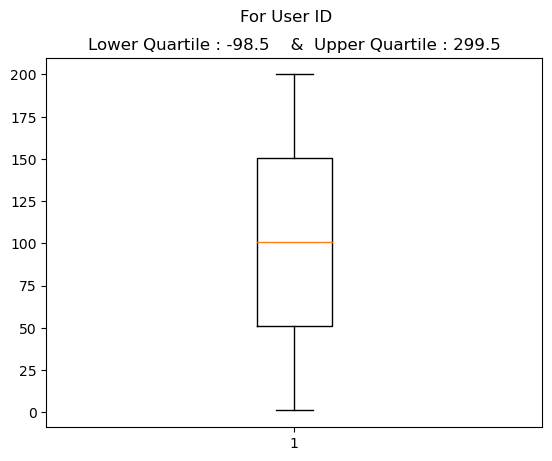

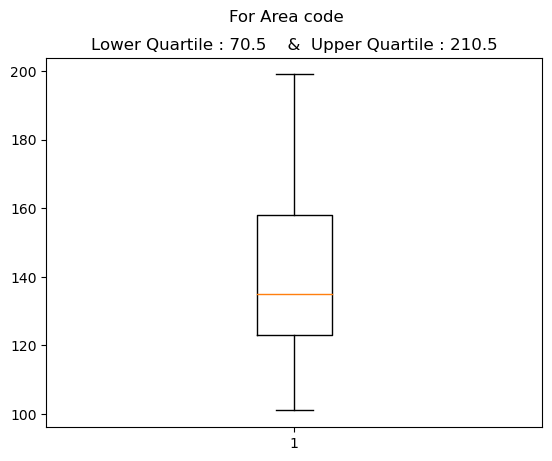

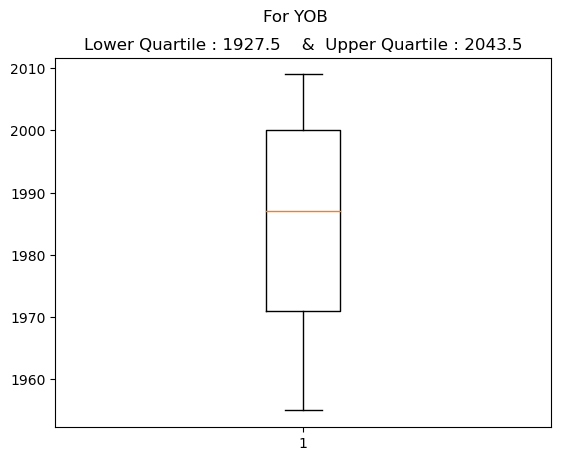

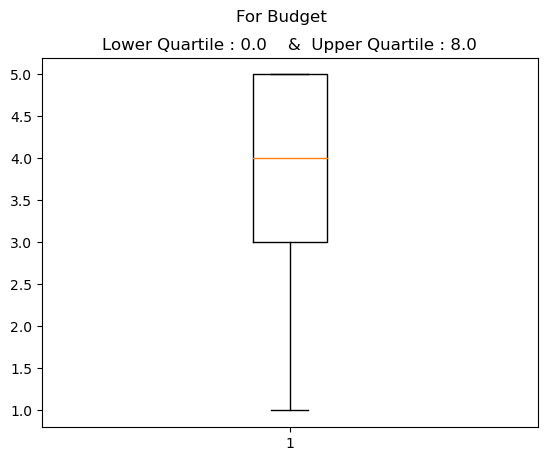

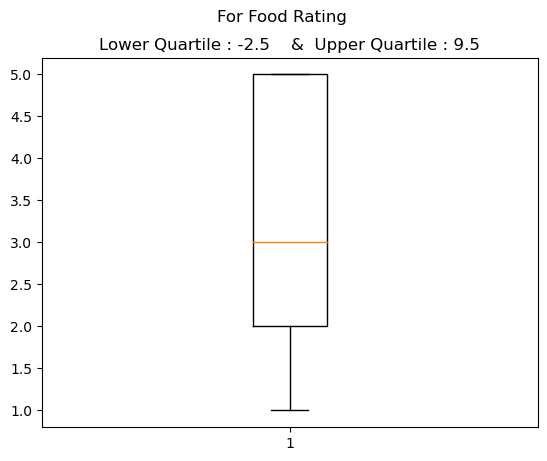

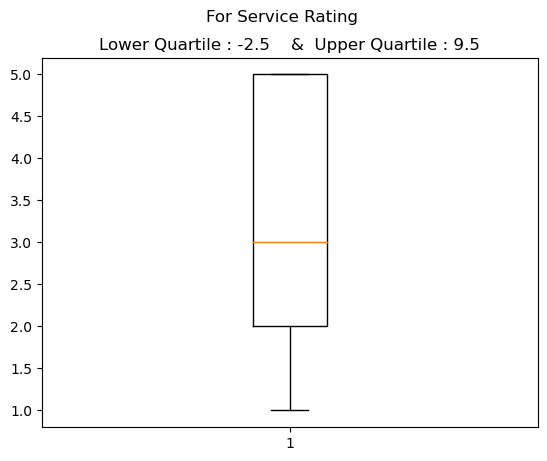

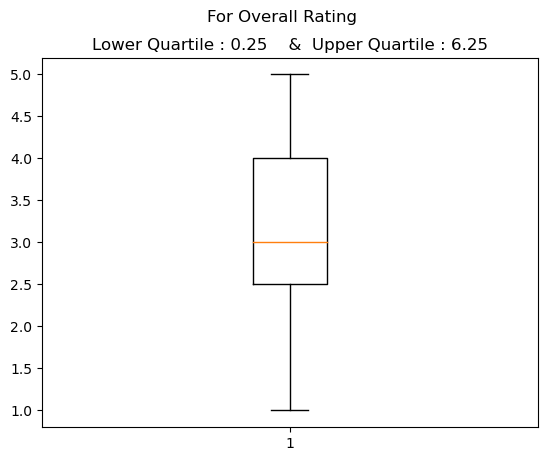

In [17]:
#Plotting information about outliers through box plot
#Getng information about outliers of columns in a dataset
def Find_Outliers(df):
    for i in num:
        q1=df[i].quantile(0.25)
        q3=df[i].quantile(0.75)
        IQR=q3-q1
        l1=q1 - (IQR * 1.5)
        l2=q3 + (IQR * 1.5)
        l3=df[i]<=l1
        l4=df[i]>=l2
        outliers = df[((df[i]<(l1)) | (df[i]>(l2)))]
        plt.figure()
        plt.boxplot(df[i])
        plt.title(f"Lower Quartile : {l1}    &  Upper Quartile : {l2}")
        plt.suptitle(f"For {i}")
        print(f"for {i}",np.where(l3) and np.where(l4))
        
    
Find_Outliers(df)


# There are no outliers in the dataset and hence the data is cleaned

In [18]:
df.head()


,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


# Bar plot


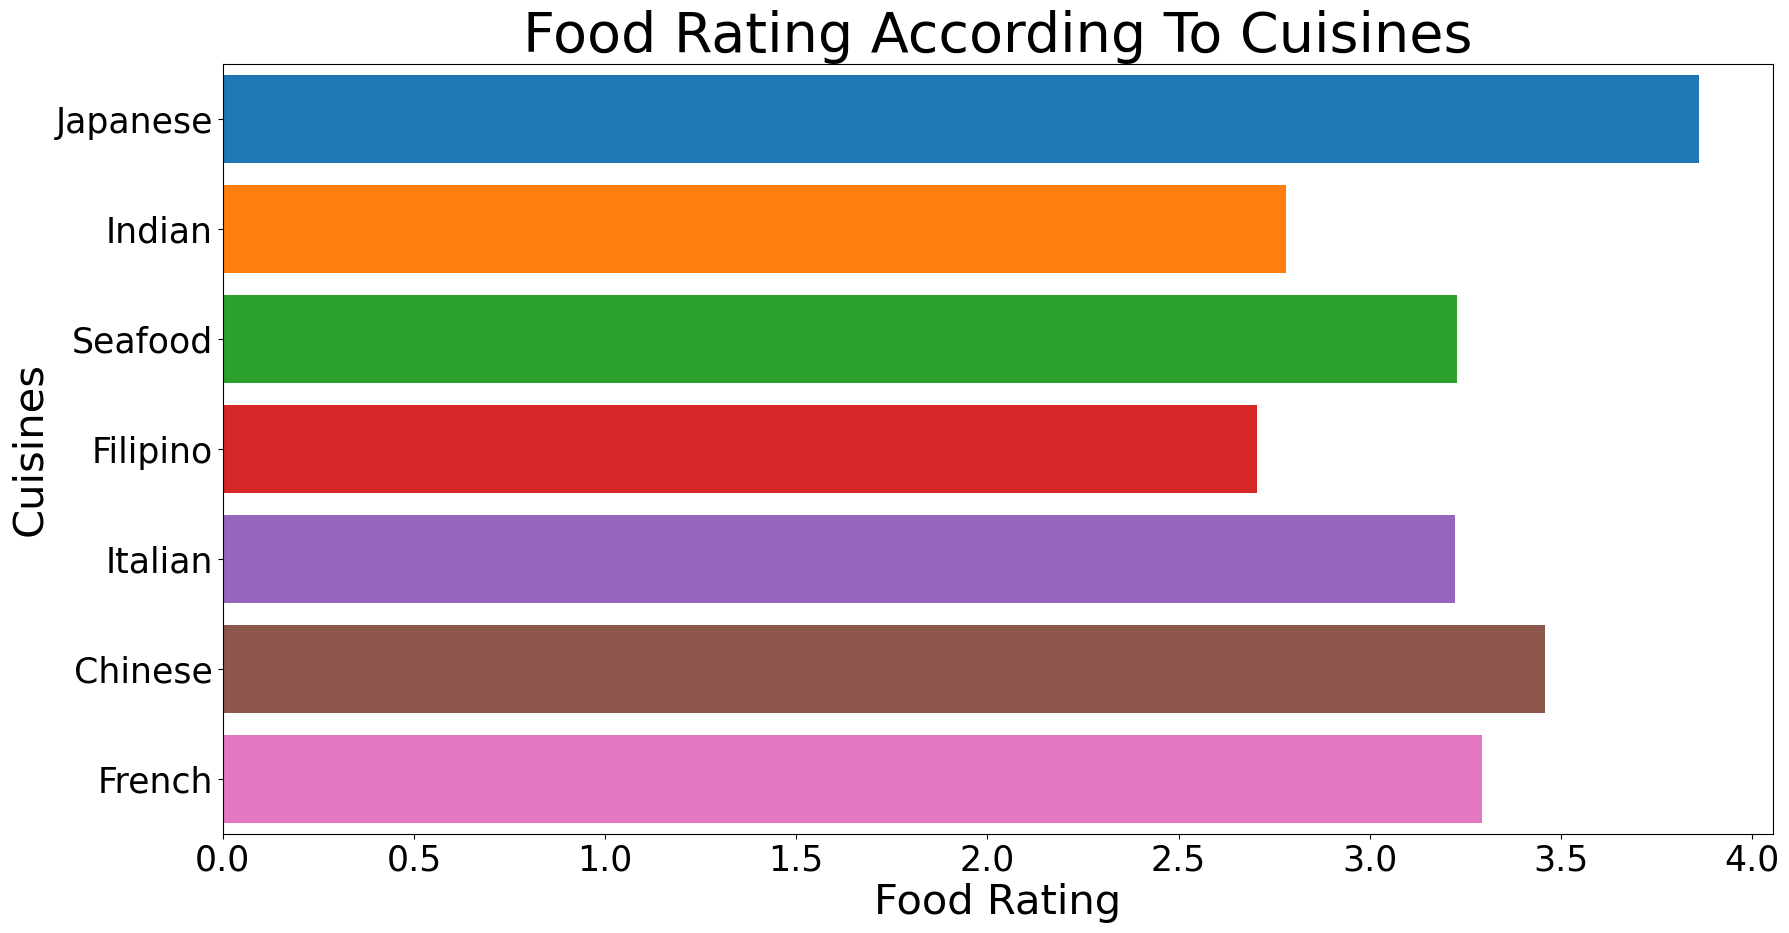

In [29]:
#Plotting bar plot of cuisines and food ratings of dataset
def plot_bar(df,x_axis,y_axis):
    sns.barplot(y=df[y_axis],x=df[x_axis],saturation=5.5,errorbar=None)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(x_axis,fontsize=30)
    plt.ylabel(y_axis,fontsize=30)
    plt.title("Food Rating According To Cuisines",fontsize = 40)

fig = plt.figure(figsize=(20,10))
plot_bar(df,'Food Rating','Cuisines')

#  From above figure it is clear that Japnese food cuisine has maximum rating where as filipino has minimum food rating


# Pie plot


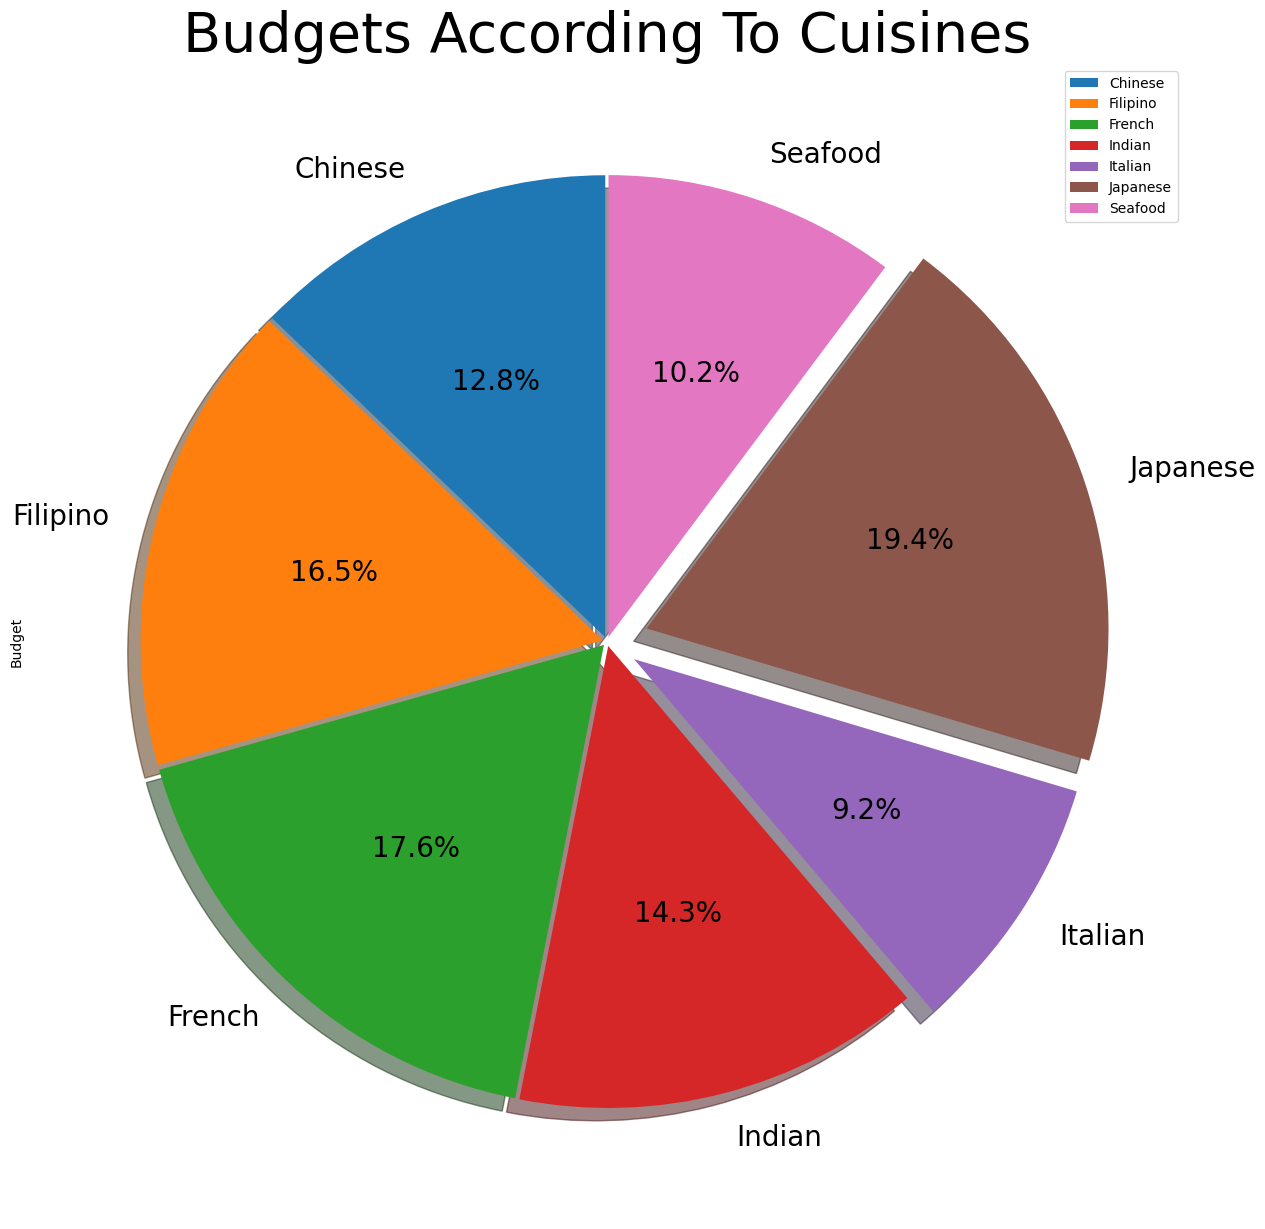

In [30]:
#Plotting pie plot of cuisines and its budget
def pie_chart(df,x_axis):
    fig = plt.figure(figsize=(30,15))
    budget_cuisine.plot(kind='pie',rot=90,explode=(0.01,0.01,0.01,0.01,0.07,0.09,0.01),startangle = 90,shadow = True,autopct='%1.1f%%', textprops={'fontsize': 20})
    plt.legend()
    plt.title("Budgets According To Cuisines",fontsize = 40)
    
pie_chart(df,'budget_cuisine')

 Here it shows that Japneses food is most expensive and Italian is least
 

C:\Users\Dell\AppData\Local\Temp\ipykernel_1992\1040063468.py:4: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=11.0)
C:\Users\Dell\AppData\Local\Temp\ipykernel_1992\1040063468.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,2)


Text(0.5, 1.0, 'Subplot-2\nConsumption of Alcohol according \nto Gender and Martial status')

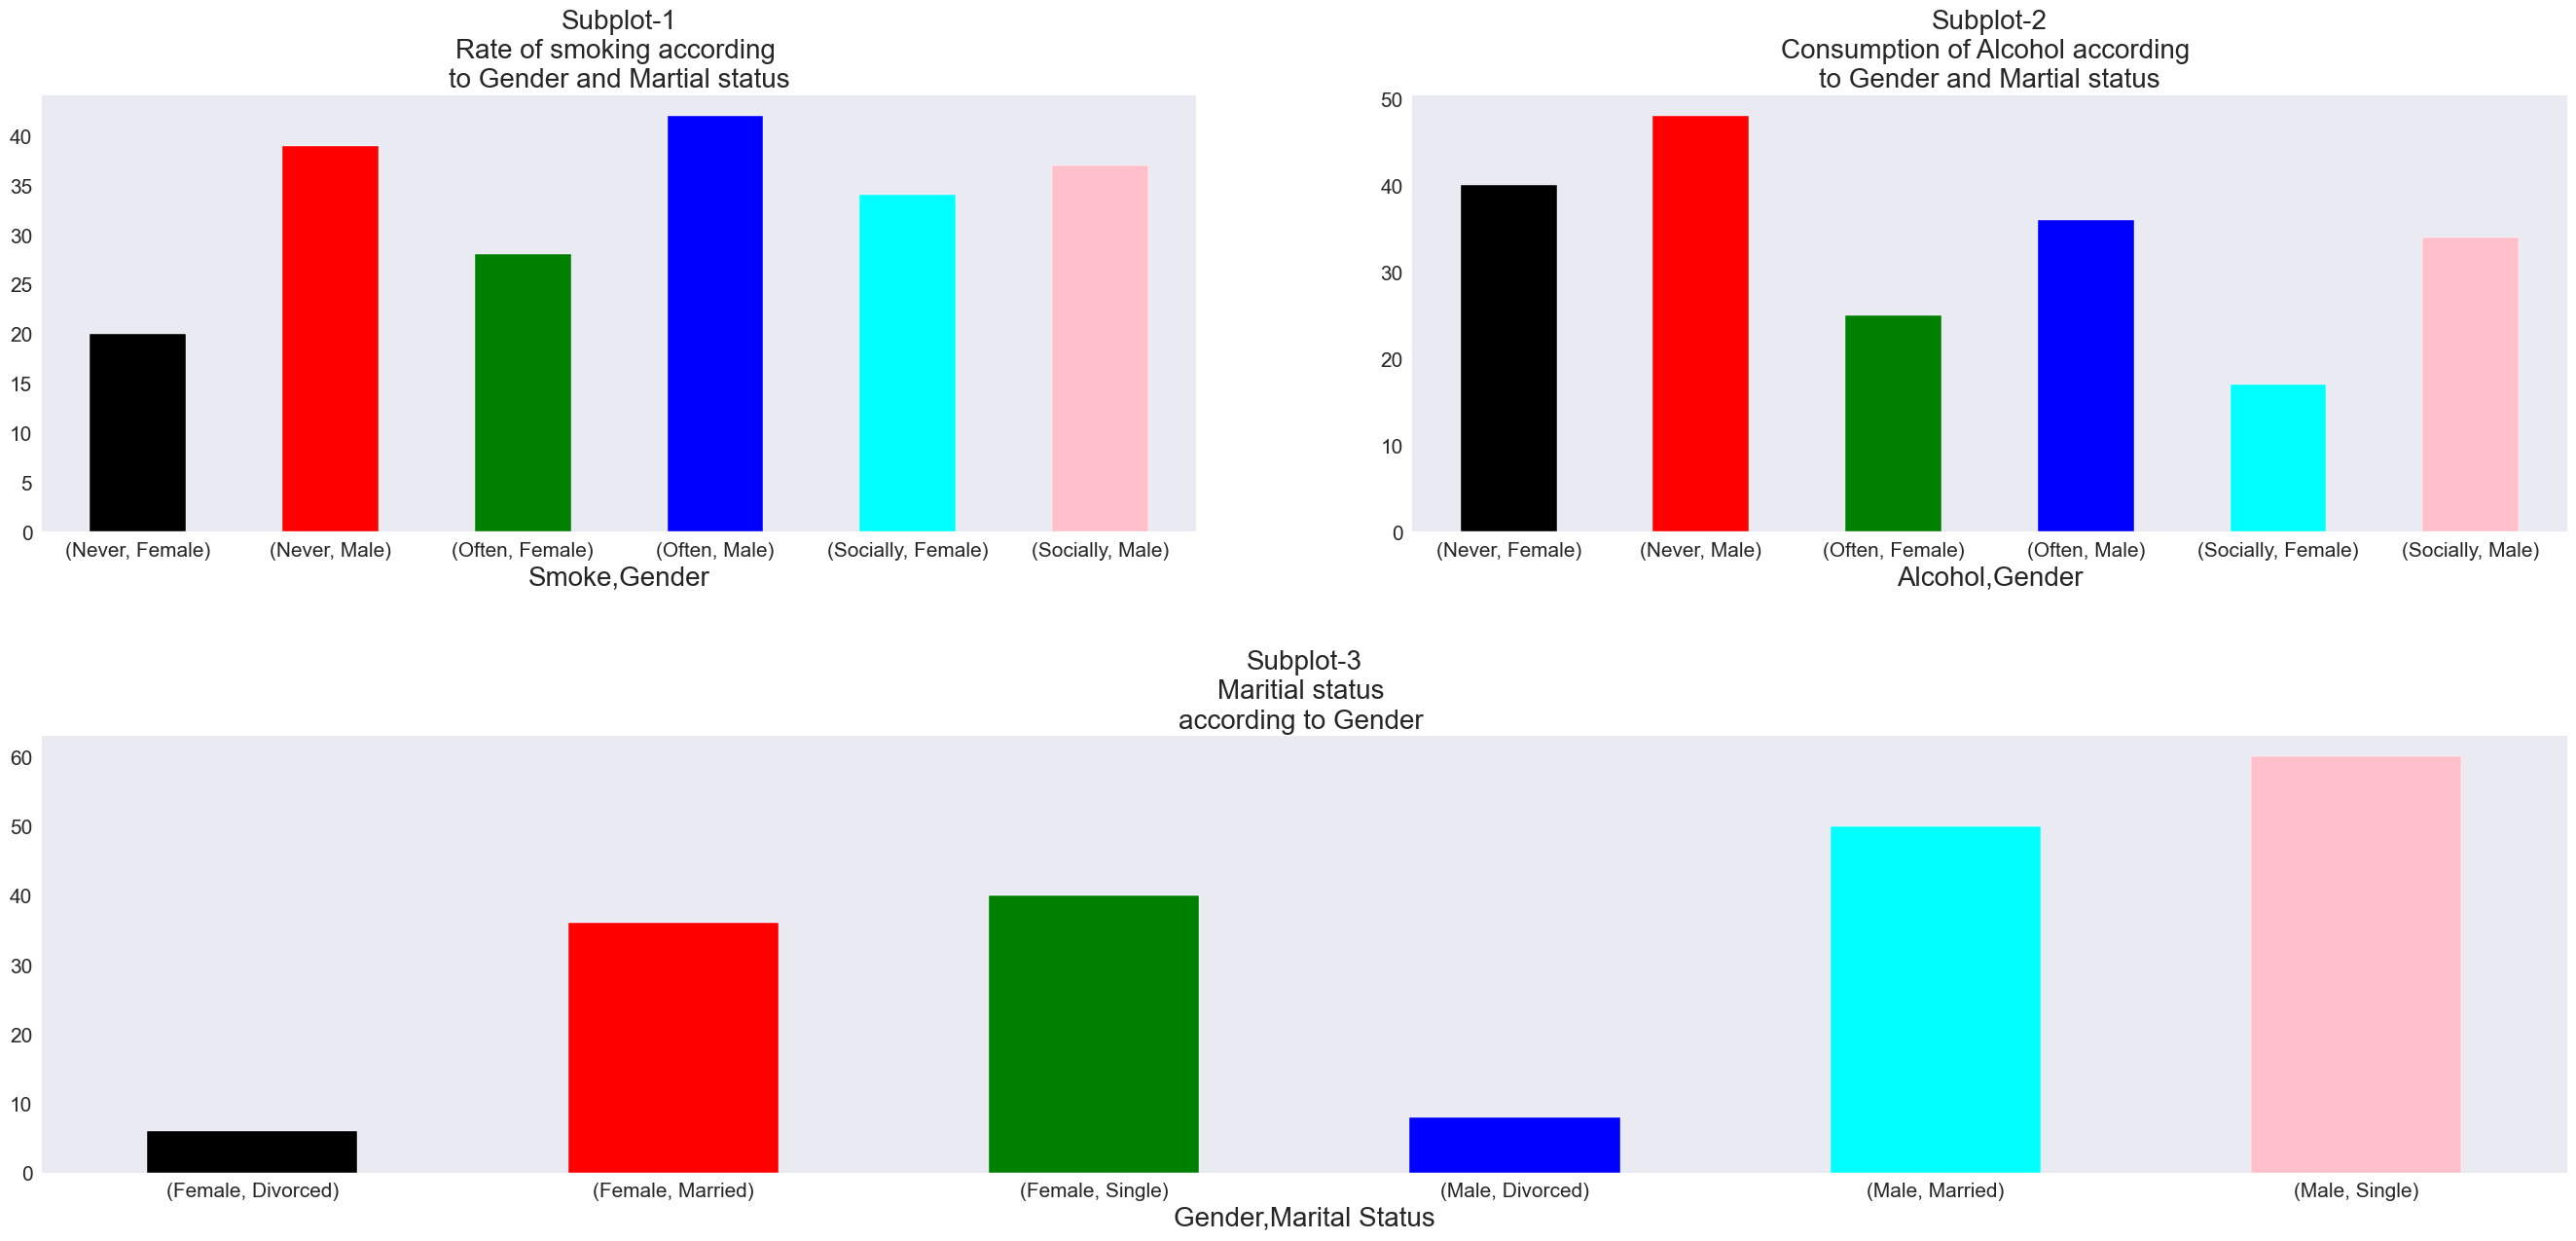

In [65]:
#Plotting subplot of drink and smoke ratio in male and female
fig, axs = plt.subplots(2, 2, figsize=(30, 15))
fig.tight_layout()
fig.tight_layout(pad=11.0)
plt.gca().remove()

plt.subplot(2,1,2)
gender_martial_activity.plot(kind='bar',rot=0,color=['black', 'red', 'green', 'blue', 'cyan','pink'])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Gender,Marital Status',fontsize=20)
plt.title("Subplot-3\nMaritial status \naccording to Gender ",fontsize = 20)



plt.subplot(2,2,1)
smoker_ratio.plot(kind='bar',rot=0,color=['black', 'red', 'green', 'blue', 'cyan','pink'])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Smoke,Gender',fontsize=20)
plt.title("Subplot-1\nRate of smoking according \nto Gender and Martial status",fontsize = 20)



plt.subplot(2,2,2)
drink_ratio.plot(kind='bar',rot=0,color=['black', 'red', 'green', 'blue', 'cyan','pink'])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Alcohol,Gender',fontsize=20)
plt.title("Subplot-2\nConsumption of Alcohol according \nto Gender and Martial status",fontsize = 20)


Subplot1- From subplot1 we conclude that their is maximum number of male who smoke often and least number of females who smoke never

Subplot2- From subplot2 we conclude that their is maximum number of male who never drink alcholol and least number of females who often drink alcholol

Subplot3- From subplot3 we conclude that their is maximum number of single male and least number of divorced females

# Heat Map

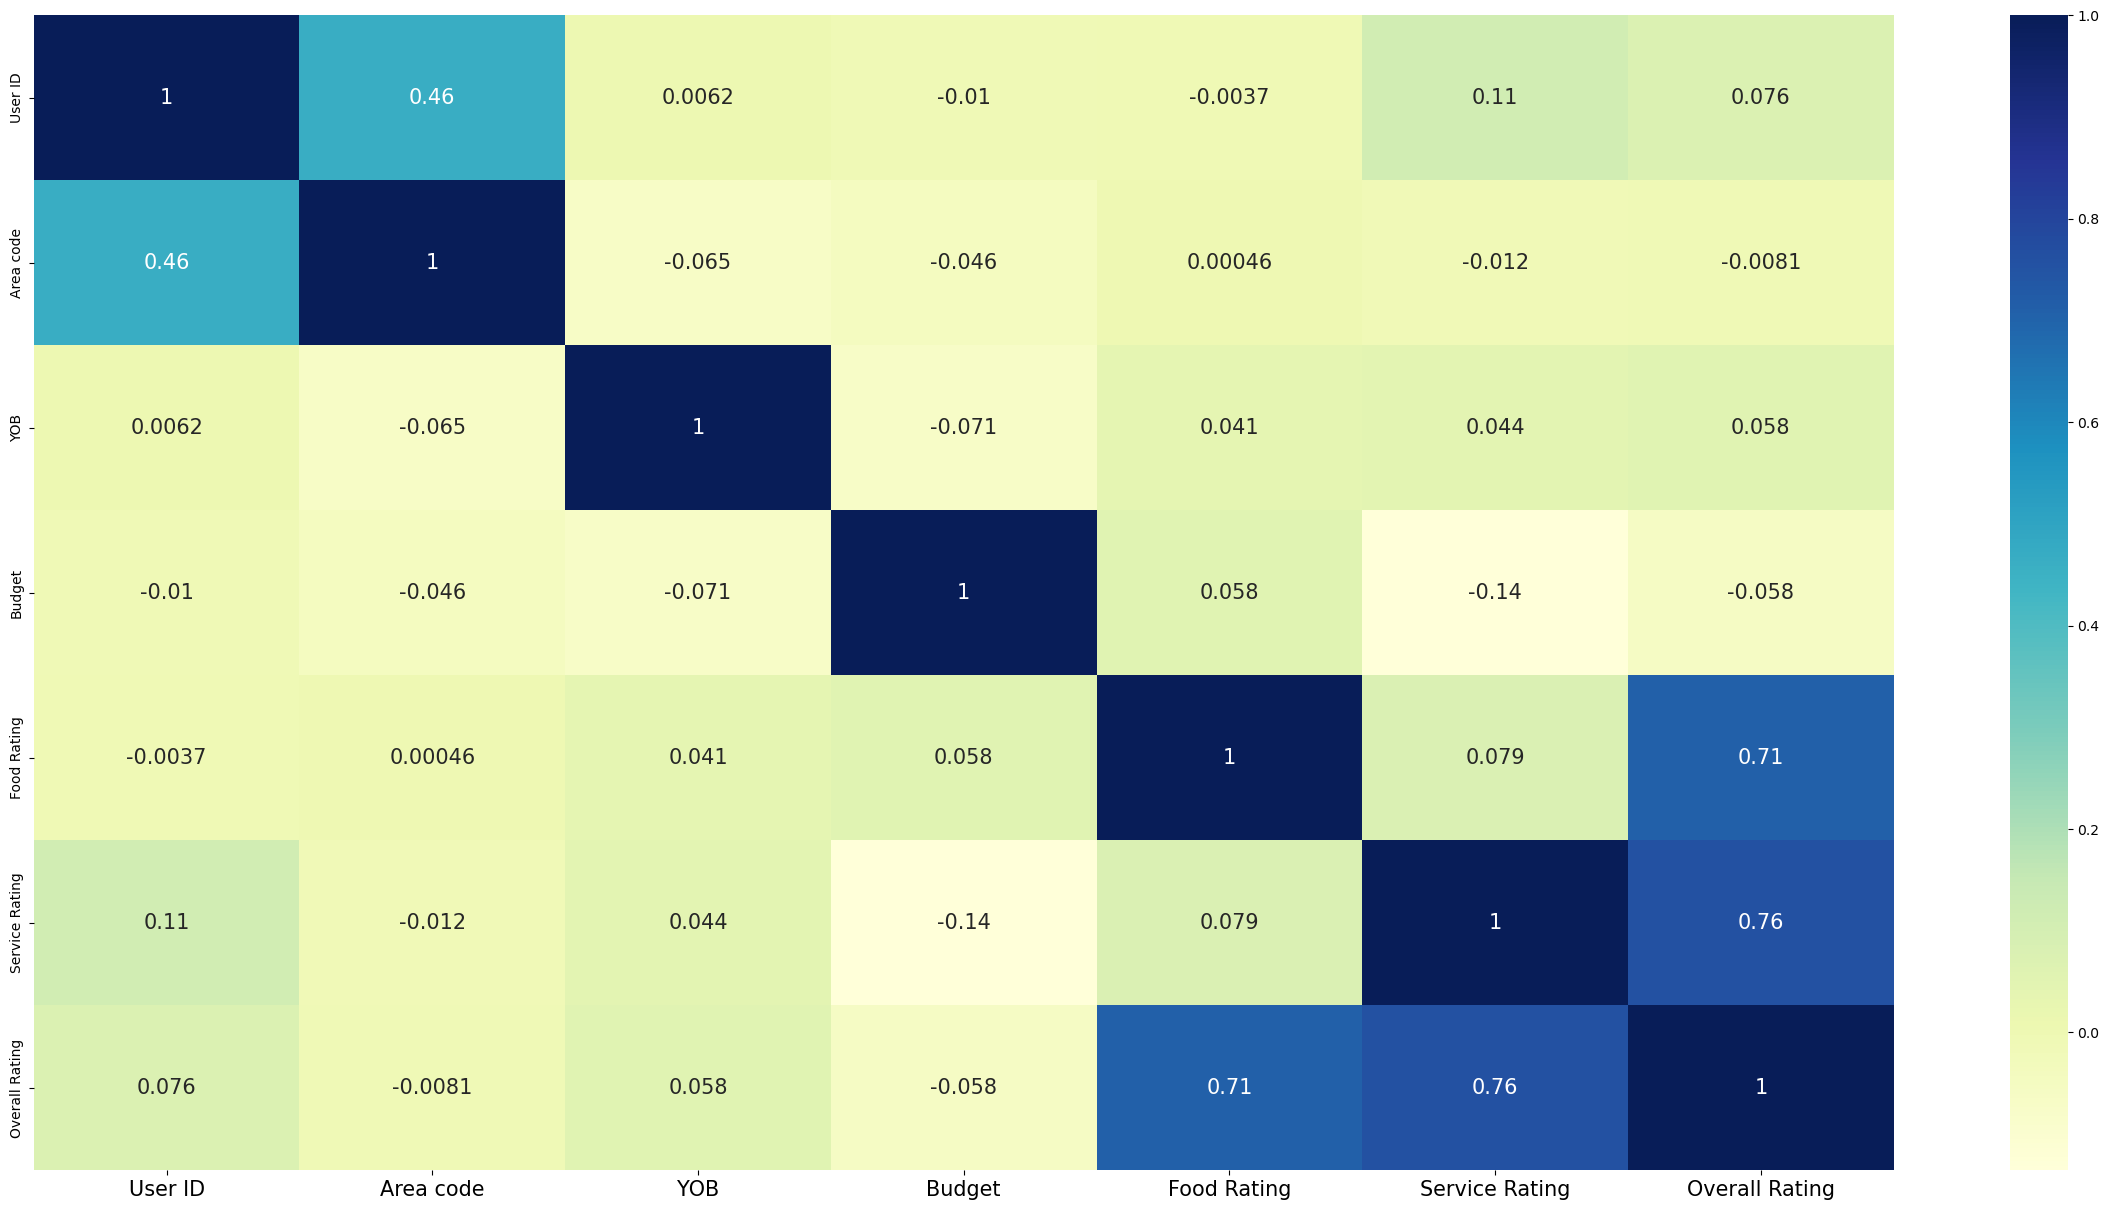

In [34]:
#Correlation plot gives us information about the terms which are correlated to each other
# Identify columns with non-numeric values
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns

# Drop non-numeric columns
df_numeric = df.drop(columns=non_numeric_cols)

# Convert remaining columns to numeric if needed
df_numeric = df_numeric.apply(pd.to_numeric, errors='coerce')

# Calculate correlation matrix
corr_matrix = df_numeric.corr()

# Plot the correlation matrix
fig = plt.figure(figsize=(30, 15))
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True, annot_kws={'size': 15})
plt.xticks(fontsize=15)
plt.show()


# There is a slight correlation between food rating, service rating and overall rating


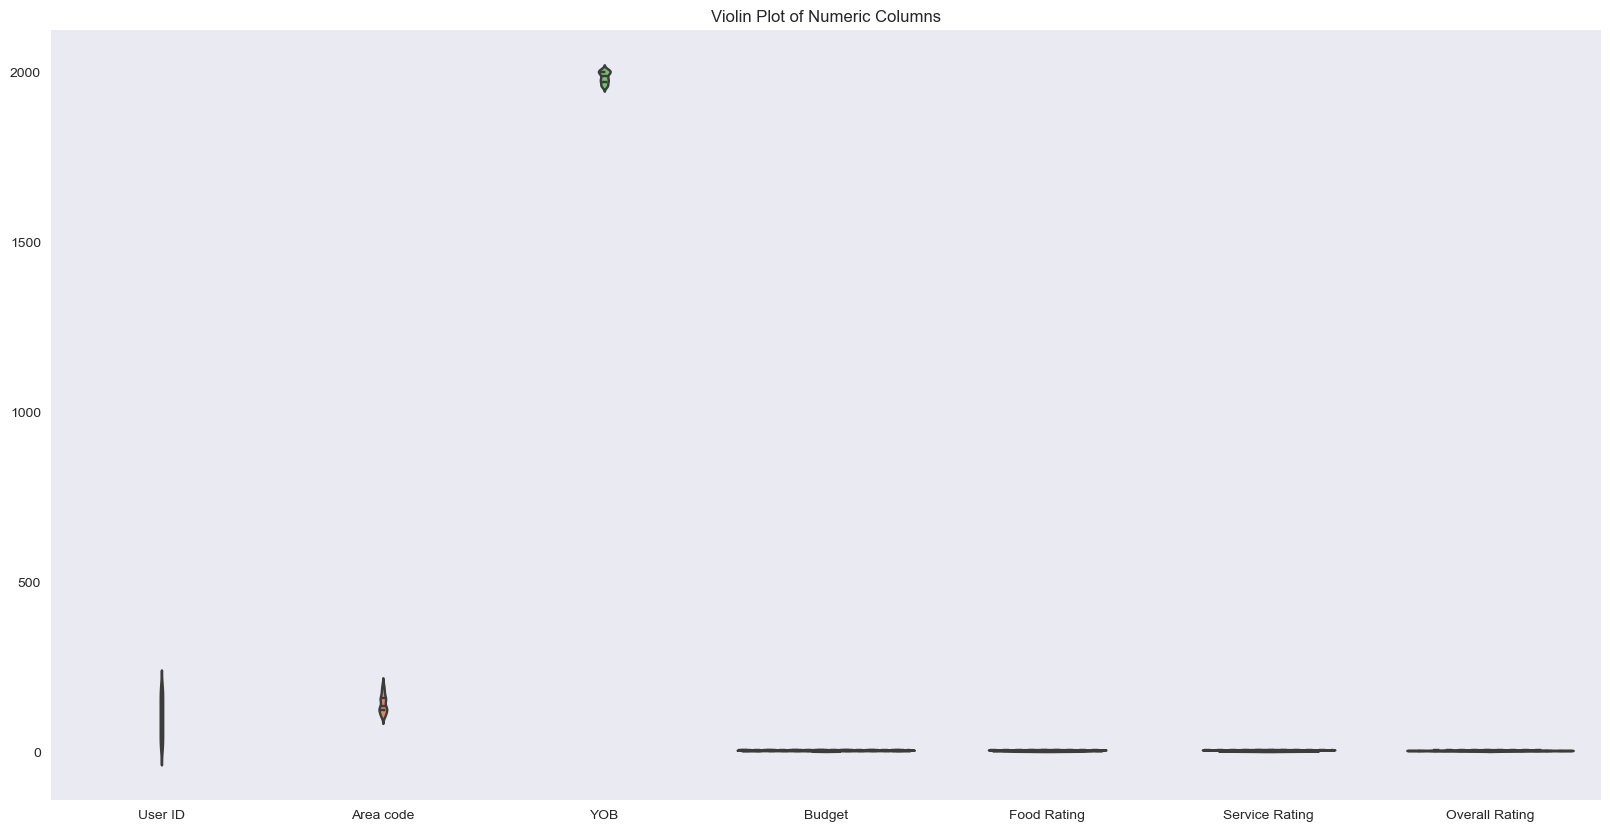

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out non-numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Plot the violin plot
plt.figure(figsize=(20, 10))
sns.violinplot(data=numeric_df, palette="muted", inner="quartile")
plt.title("Violin Plot of Numeric Columns")
plt.show()


# Joint Plot

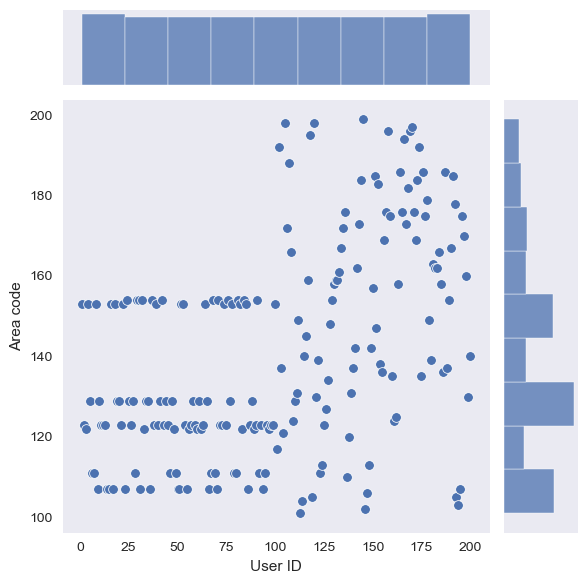

In [61]:
# Select two numeric columns for the joint plot
x_col = df.columns[0]
y_col = df.columns[1]

# Create a joint plot
sns.jointplot(x=x_col, y=y_col, data=df, kind="scatter")
plt.show()


# Pairplot

C:\Users\Dell\.anaconda\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


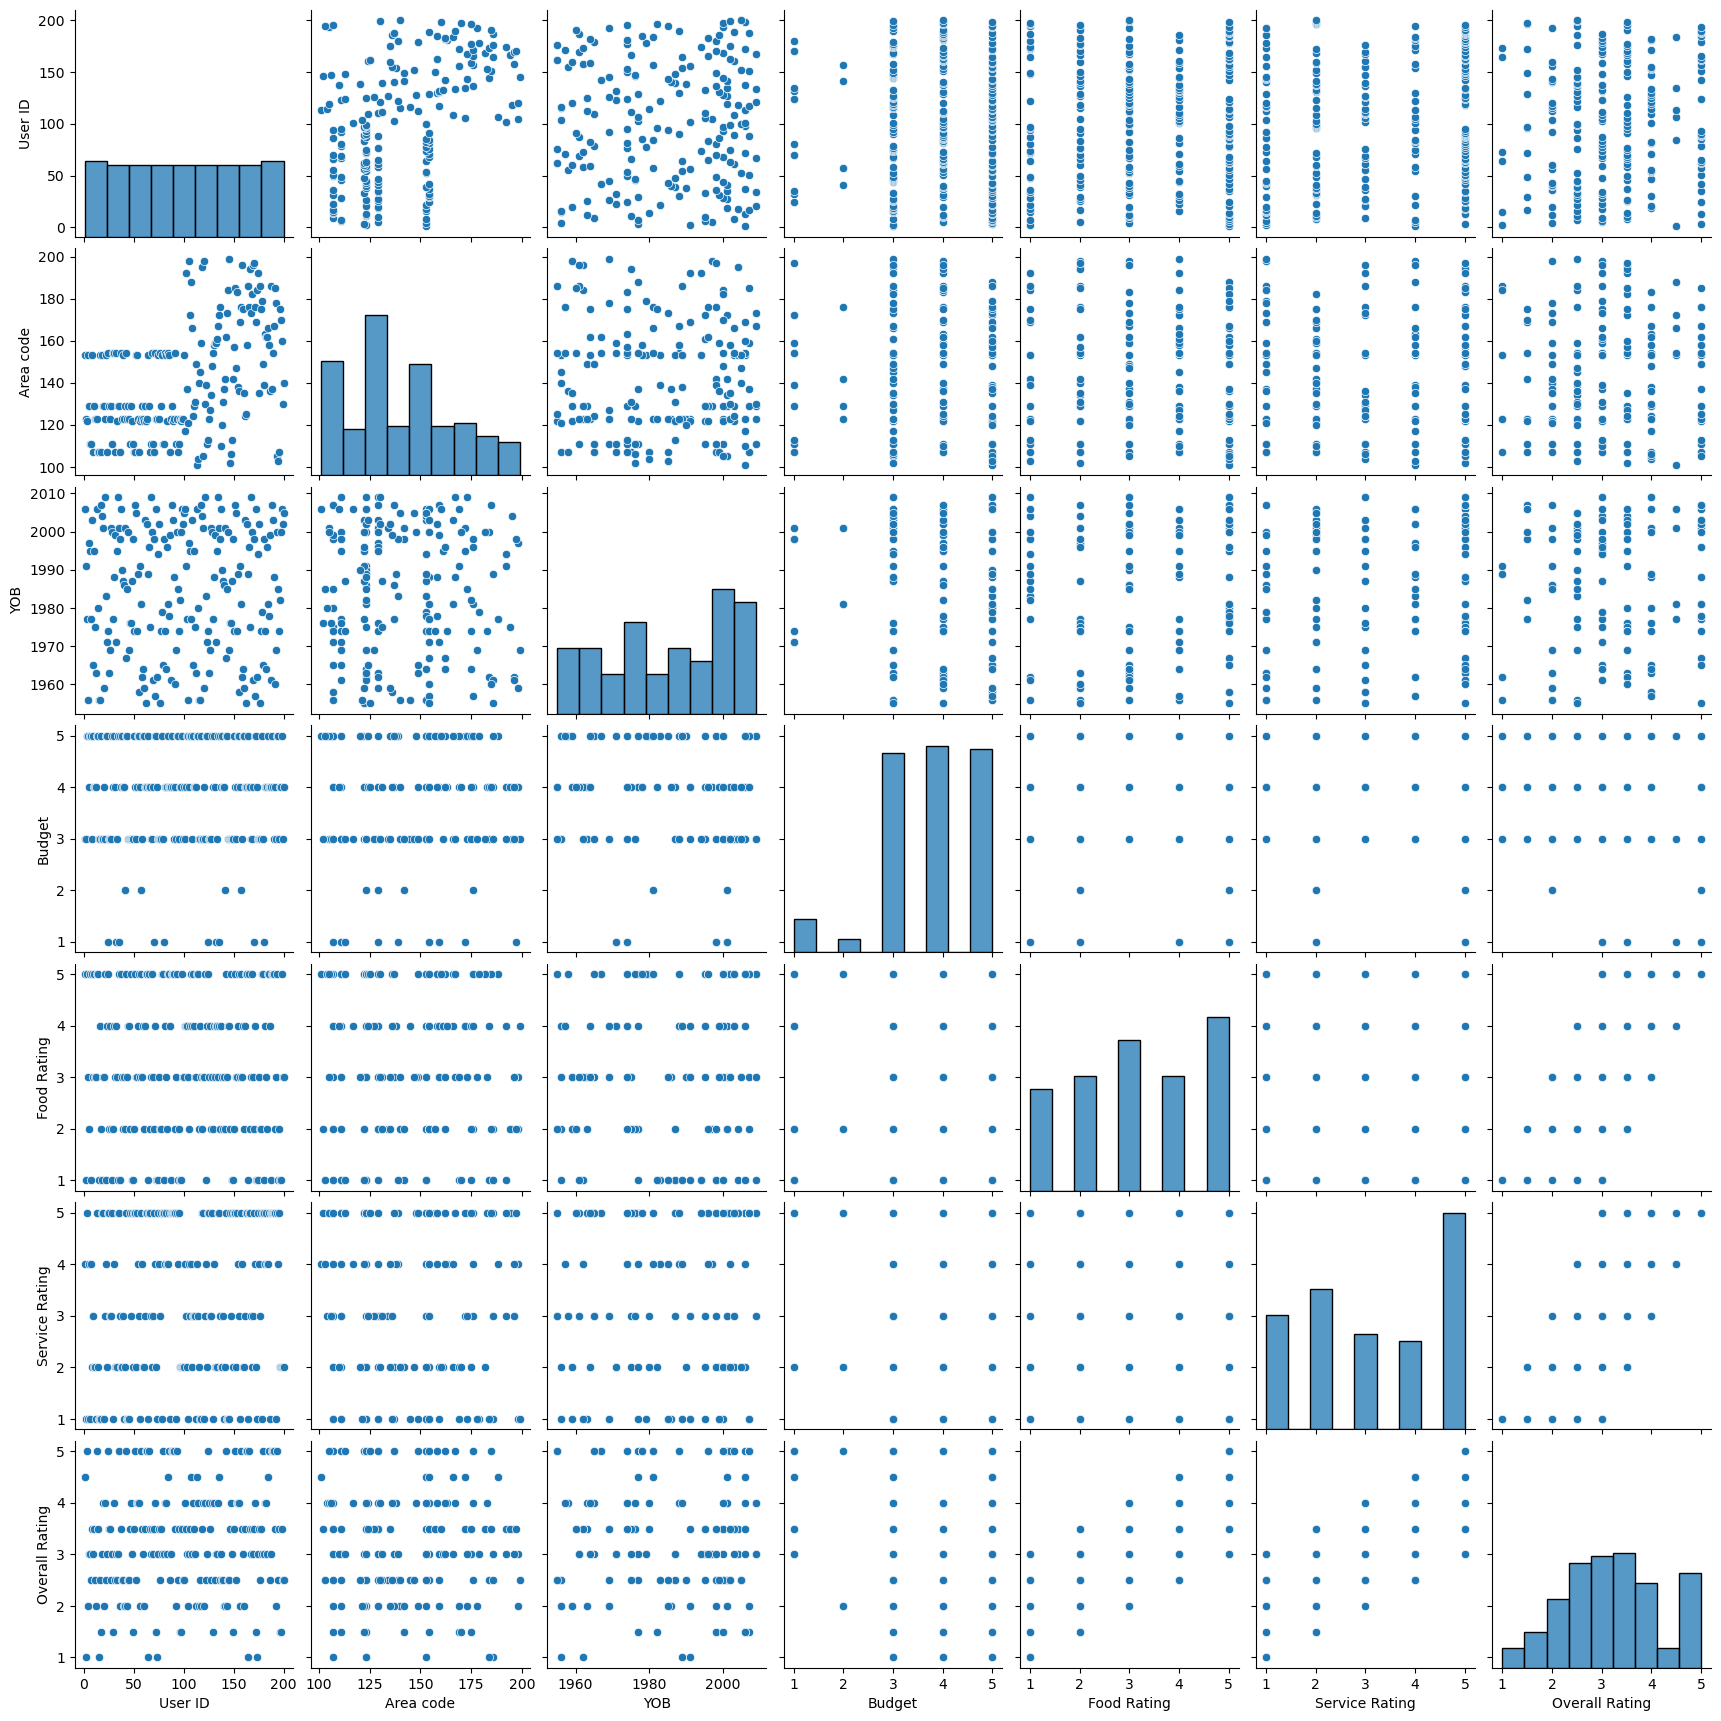

In [51]:
sns.pairplot(df)

plt.show()


# Countplot


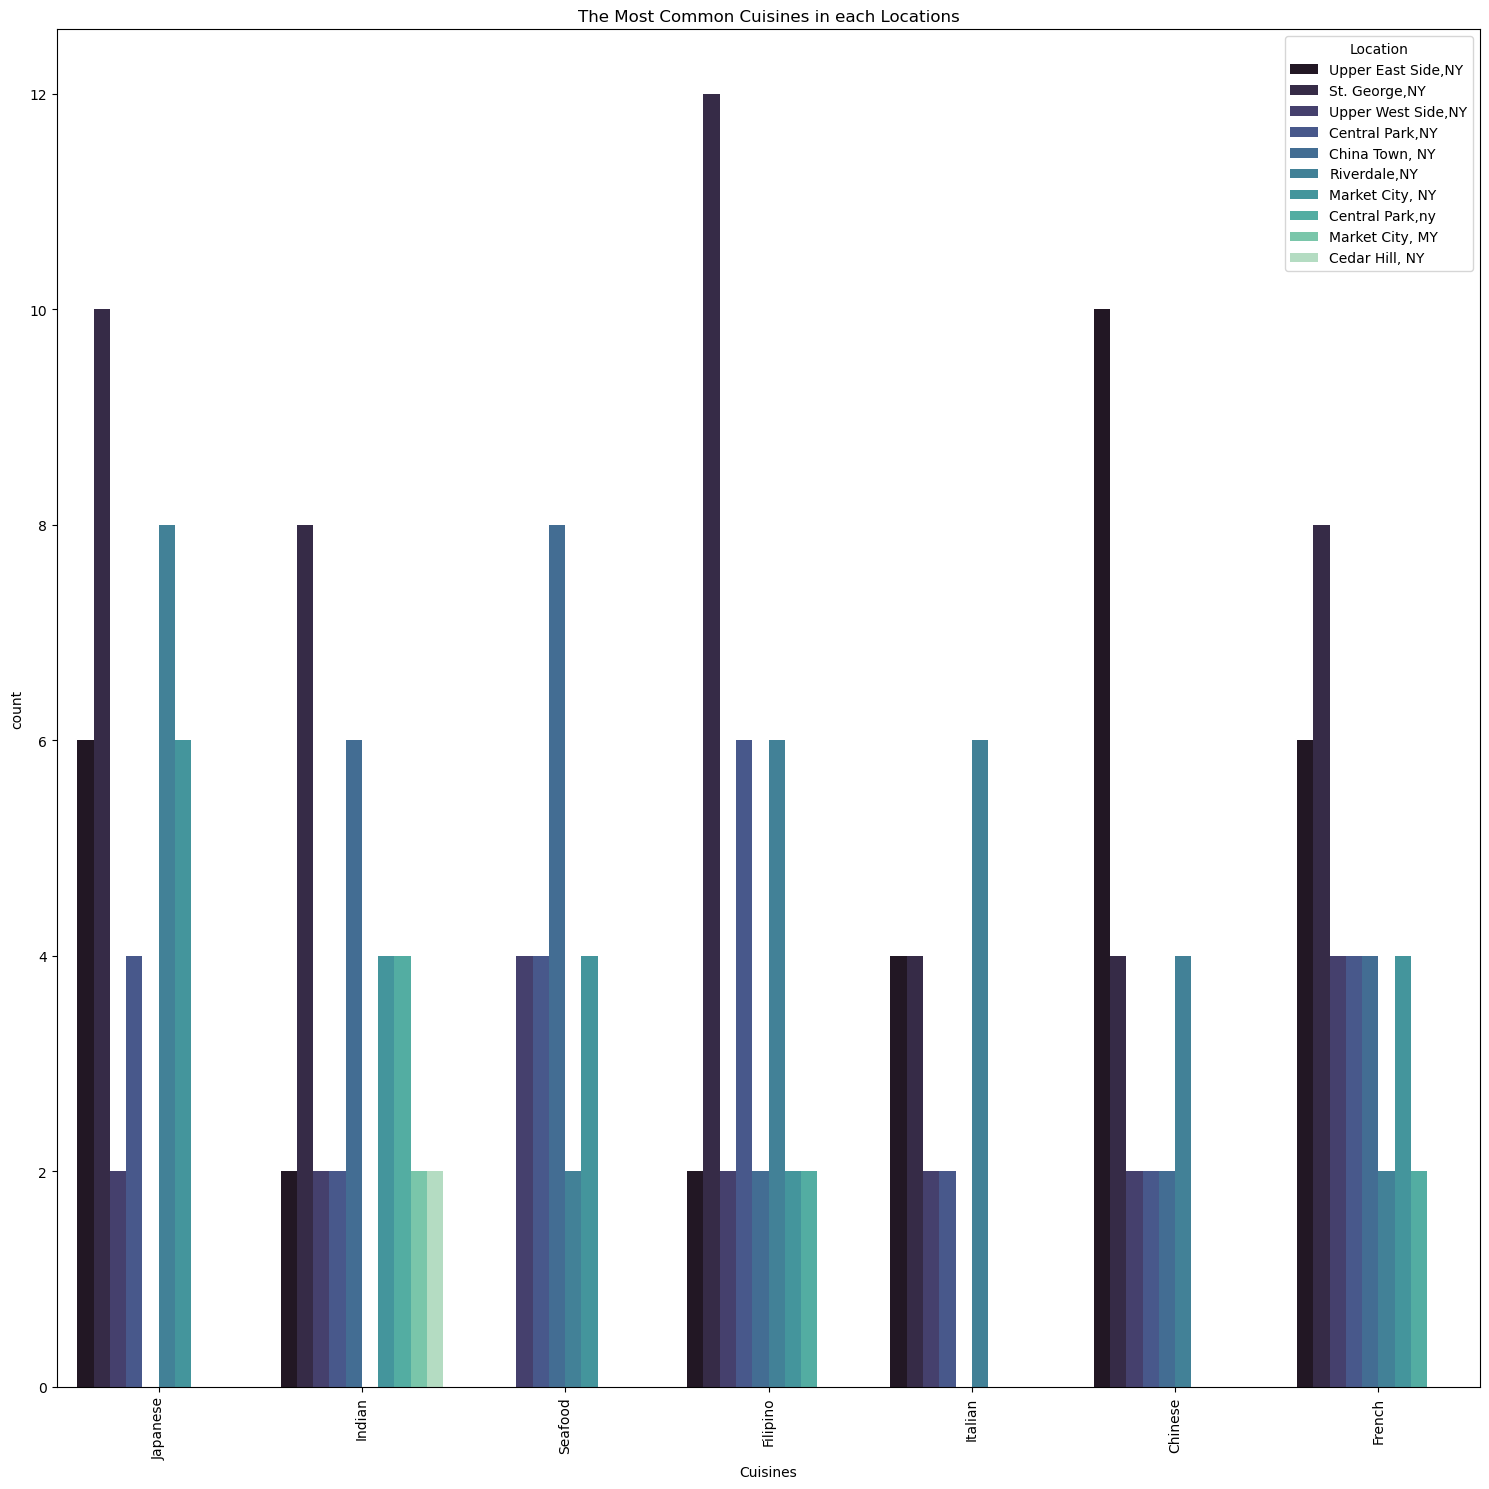

In [53]:
plt.figure(figsize=(15,15))
sns.countplot(data=df, x='Cuisines', hue='Location', palette='mako')
plt.title('The Most Common Cuisines in each Locations')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The dataset is pretty clean, no null observations, suitable data types.Food and service is highly rated, which scales from 3 to 5. Most of ratings are at the highes ranking that is 5 stars.n term of cuisines, Japanese, Fillipino and French dishes account for the highest proportion, which are 18%, 17%, 17% respectively. 
There is no significant difference between Chinese, Seafood, Italian cuisine distributions, about 10% of total.
Female customers tend to prefer Chinese and Italian dishes than others while males are opposite. 